In [17]:
def get_sequence(accession, filename='GenDataset.csv'):
    import pandas as pd
    
    # Load the dataset into a Pandas dataframe
    df = pd.read_csv(filename)
    
    # Find the row corresponding to the given accession
    row = df[df['Accession'] == accession].iloc[0]
    
    # Extract the DNA sequence from the row
    sequence = row['Sequence']
    
    return sequence

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_virus_genome(genome, colors):
    # Define the colors for each nucleotide base
    base_colors = {"A": "green", "T": "red", "C": "blue", "G": "orange","N" : "white"}
    colors_tag = ["Adenine", "Thymine" ,"Cytosine", "Guanine" ,"NULL"]
    # Calculate the length of the genome and the angle for each base
    n = len(genome)
    angles = np.linspace(0, 2*np.pi, n+1, endpoint=True)
    
    # Create a figure with a polar projection
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="polar")
    
    # Plot each base as a line segment with the appropriate color
    for i in range(n):
        base = genome[i]
        ax.plot([angles[i], angles[i+1]], [1, 1], color=base_colors[base], linewidth=25)
    
    # Set the axis limits and ticks
    ax.set_ylim(0, 1.1)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])
    
    # Add the genome legend
    for i in range(0, n, 100):
        ax.plot(angles[i], 1.1, marker="o", markersize=4, color=base_colors[genome[i]])
        ax.text(angles[i], 1.15, genome[i:i+10], fontsize=3, ha="center")
    
    # Add the color legend
    for i in range(len(colors)):
        ax.plot(np.nan, np.nan, color=colors[i], linewidth=2, label=colors_tag[i])
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

In [25]:
genome = get_sequence('MT467262')
colors = ["green", "red", "blue", "orange","white"]
print(genome)
print(len(genome))

TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTG

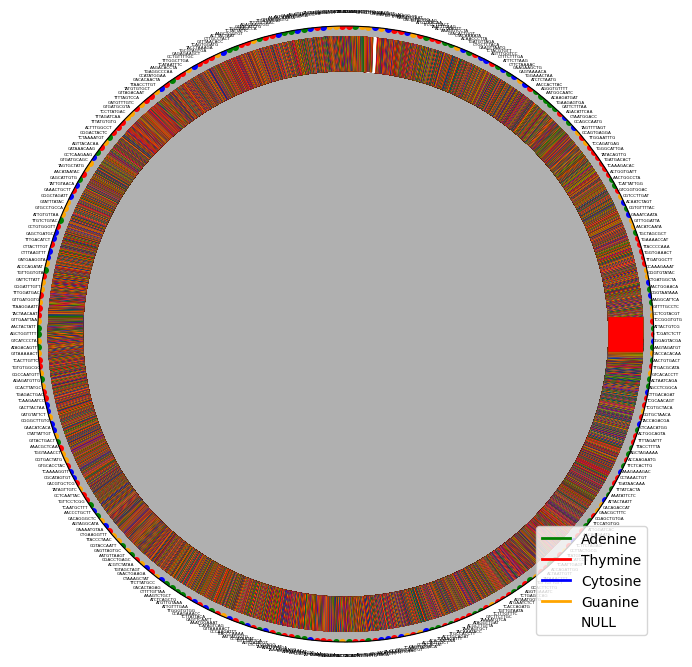

In [24]:
visualize_virus_genome(genome, colors)